In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco

### 1. Multi-class Classification

In [7]:
data = loadmat("ex3data1.mat")

In [16]:
X = data["X"]
X.shape, X[:5]

((5000, 400),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [17]:
y = data["y"][:,0]
y.shape

(5000,)

### Visualizing the data

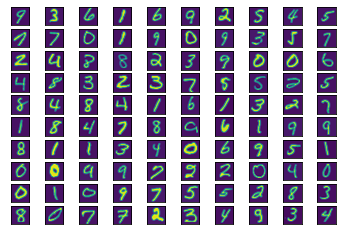

In [26]:
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Take random datapoints as they are ordered
    plt.imshow(X[np.random.randint(X.shape[0]),:].reshape(20,20).T)
    plt.xticks([])
    plt.yticks([])    

### Vectorizing Logistic Regression

In [68]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def Jreg(X,y,theta,lamda):
    n = len(y)
    h = sigmoid(np.dot(X, theta))
    l = np.array([lamda]*(X.shape[1]))
    l[0]=0
    j = -(np.dot(y,np.log(h))+np.dot(1-y,np.log(1-h)))/n+np.dot(theta*l,theta)/(2*n)
    grad = np.dot(X.T,(h-y))/n+theta*l/n
    return j, grad

In [70]:
theta = np.array([-2, -1, 1, 2])
X = np.ones((5,4))
X2 = np.arange(1,16).reshape(3,5).T/10.
X[:,[1,2,3]] = X2
y = np.array([1,0,1,0,1])

lreg = 3
j, grad = Jreg(X,y,theta,lreg)
j, grad

(2.5348193961097443,
 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]))

### One-vs-all Classification

In [95]:
def one4all(y, yval):
    return y==yval.astype(int)

def Jmin_reg(theta,X,y,lamda):
    n = len(y)
    h = sigmoid(np.dot(X, theta))
    l = np.array([lamda]*(X.shape[1]))
    l[0]=0
    j = -(np.dot(y,np.log(h))+np.dot(1-y,np.log(1-h)))/n+np.dot(theta*l,theta)/(2*n)
    return j

def GradMin_reg(theta,X,y,lamda):
    n = len(y)
    h = sigmoid(np.dot(X, theta))
    l = np.array([lamda]*(X.shape[1]))
    l[0]=0
    grad = np.dot(X.T,(h-y))/n+theta*l/n
    return grad

In [114]:
data = loadmat("ex3data1.mat")
X = data["X"]
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = data["y"][:,0]
l = 0.1
fit_thetas = []
for i in np.unique(y):
    yf = one4all(y,i)
    r = sco.minimize(Jmin_reg, x0=np.zeros(X.shape[1]), args=(X,yf,l), method='CG', jac=GradMin_reg)
    fit_thetas.append(r.x)
fit_thetas = np.array(fit_thetas)

In [115]:
fit_thetas

array([[-3.05701911e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.62218597e-03,  3.95417109e-08,  0.00000000e+00],
       [-3.74854469e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.29975065e-02, -2.56601749e-03,  0.00000000e+00],
       [-5.71087627e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.32135429e-05, -2.46213128e-07,  0.00000000e+00],
       ...,
       [-9.12277606e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.28351280e-04,  5.79481367e-05,  0.00000000e+00],
       [-5.63077594e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.10719173e-02,  8.44352603e-04,  0.00000000e+00],
       [-8.06950903e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.53546393e-05,  4.56704140e-06,  0.00000000e+00]])

### One-vs-all Prediction

In [132]:
entry_test = 478

preds = []
for i in np.unique(y):
    preds.append(sigmoid(np.dot(X[entry_test,:], fit_thetas[i-1])))
preds = np.array(preds)
final_guess = np.argwhere(preds==preds.max())[0][0]+1

print(f"PREDICTED {final_guess} ; ACTUAL VALUE {y[entry_test]}")
    #sigmoid()

PREDICTED 10 ; ACTUAL VALUE 10


### 2. Neural Networks

In [10]:
data = loadmat("ex3weights.mat")
tset = loadmat("ex3data1.mat")

In [24]:
X, y = tset["X"], tset["y"]
X = np.hstack((np.ones((X.shape[0], 1)), X))
th1, th2 = data["Theta1"], data["Theta2"]

In [64]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict_h(th1, th2, X):
    a_1 = sigmoid(np.dot(th1,X.T))
    a_1 = a_1.T
    a_1 = np.hstack((np.ones((a_1.shape[0], 1)), a_1))
    h = sigmoid(np.dot(th2,a_1.T))
    return h

array([[1.12661530e-04, 4.79026796e-04, 8.85702310e-05, ...,
        5.17641791e-02, 8.30631310e-04, 4.81465717e-05],
       [1.74127856e-03, 2.41495958e-03, 3.24266731e-03, ...,
        3.81715020e-03, 6.22003774e-04, 4.58821829e-04],
       [2.52696959e-03, 3.44755685e-03, 2.55419797e-02, ...,
        2.96297510e-02, 3.14518512e-04, 2.15146201e-05],
       ...,
       [4.01468105e-04, 2.39107046e-03, 6.22892325e-02, ...,
        2.15667361e-03, 1.19366192e-02, 5.73434571e-03],
       [6.48072305e-03, 1.97025086e-03, 5.49803551e-03, ...,
        6.49826950e-01, 9.71410499e-01, 6.96288990e-01],
       [9.95734012e-01, 9.95696931e-01, 9.28008397e-01, ...,
        2.42384687e-05, 2.06173648e-04, 8.18576980e-02]])

In [108]:
h = predict_h(th1, th2, X)
pred = np.zeros(h.shape[1])
for i in range(h.shape[1]):
    pred[i] = np.argwhere(h[:,i]==np.max(h[:,i]))[0][0]+1
acc = np.array(pred == y[:,0], dtype='int').mean()
print("Accuracy", acc*100)

Accuracy 97.52
